In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib Anatomy

<img src="https://miro.medium.com/max/419/0*4YHR28Wt4LWg77e3.png"></img>

[]

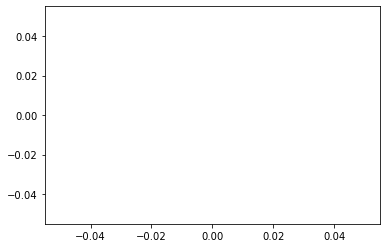

In [2]:
plt.plot()

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

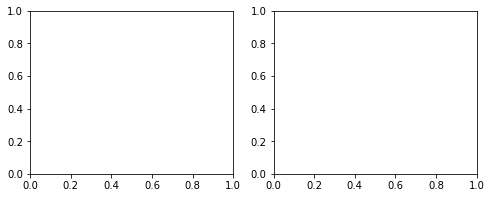

In [3]:
fig, axes = plt.subplots(ncols=2,figsize=(8,3)) #ncols,nrows,figsize(width,height)
axes

In [4]:
fig.plot()

AttributeError: 'Figure' object has no attribute 'plot'

In [5]:
type(axes[0])

matplotlib.axes._subplots.AxesSubplot

In [6]:
axes[0].plot()

[]

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/sales_data_sample.csv',encoding='Latin-1')
data.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.0,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.9,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small


# Bar Chart

**When to use**:
- Comparing parts of a bigger set of data, highlighting different categories, or showing change over time.
- Have long categories label — it offers more space.
- If you want to illustrate both positive and negative values in the dataset.

**When to avoid**:
- If you’re using multiple data points.
- If you have many categories, avoid overloading your graph. Your graph shouldn’t have more than 10 bars.

In [23]:
data['STATUS'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

<AxesSubplot:>

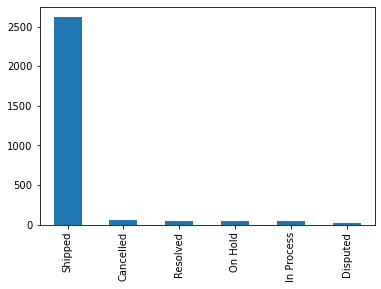

In [24]:
data['STATUS'].value_counts().plot(kind='bar')

<AxesSubplot:>

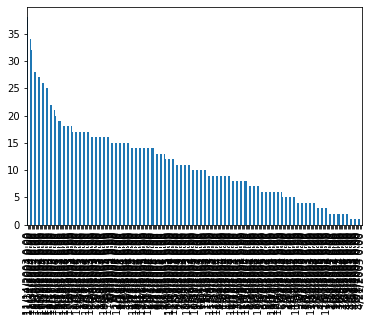

In [25]:
data['ORDERDATE'].value_counts().plot(kind='bar')

Text(0.9, 61, '60')

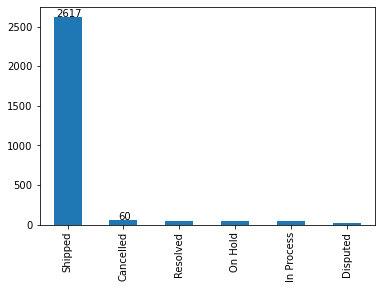

In [26]:
data['STATUS'].value_counts().plot(kind='bar')
plt.text(x=-0.2,y=2618,s=2617)
plt.text(x=0.9,y=61,s=60)

<AxesSubplot:>

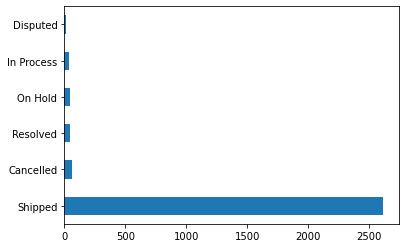

In [27]:
data['STATUS'].value_counts().plot(kind='barh')

<AxesSubplot:xlabel='STATUS'>

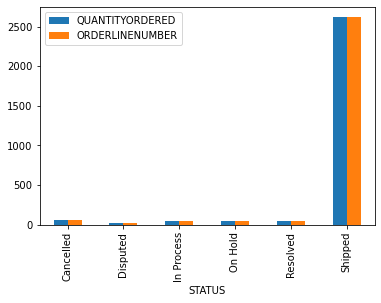

In [28]:
data.groupby('STATUS').count()[['QUANTITYORDERED','ORDERLINENUMBER']].plot(kind='bar')

<AxesSubplot:xlabel='STATUS,COUNTRY'>

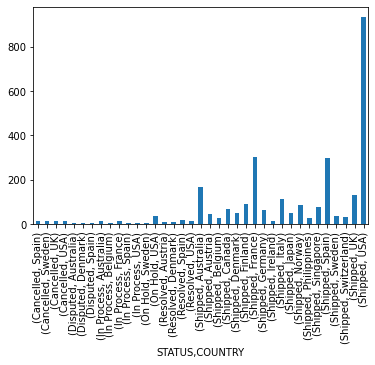

In [29]:
data.groupby(['STATUS','COUNTRY']).count()['ORDERNUMBER'].plot(kind='bar')

<AxesSubplot:ylabel='STATUS'>

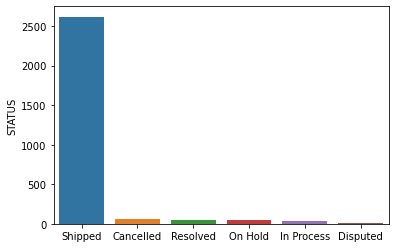

In [32]:
status_freq = data['STATUS'].value_counts()
sns.barplot(x=status_freq.index,y=status_freq,orient='v')

<AxesSubplot:xlabel='STATUS'>

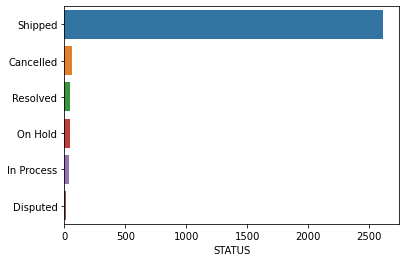

In [33]:
sns.barplot(x=status_freq,y=status_freq.index,orient='h')

<AxesSubplot:xlabel='STATUS', ylabel='ORDERNUMBER'>

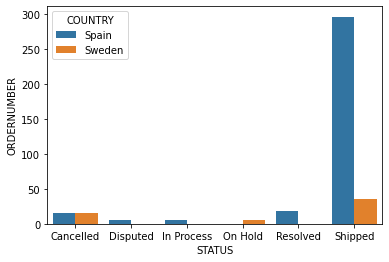

In [34]:
status_freq_multi = data[(data['COUNTRY'] == 'Spain') | (data['COUNTRY'] == 'Sweden')].groupby(['STATUS','COUNTRY']).count()['ORDERNUMBER'].reset_index()
sns.barplot(x=status_freq_multi['STATUS'],y=status_freq_multi['ORDERNUMBER'],orient='v',hue=status_freq_multi['COUNTRY'])

<AxesSubplot:xlabel='COUNTRY', ylabel='ORDERNUMBER'>

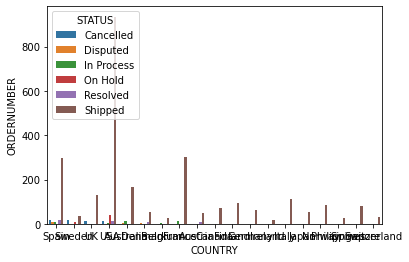

In [35]:
status_freq_multi = data.groupby(['STATUS','COUNTRY']).count()['ORDERNUMBER'].reset_index()
sns.barplot(data=status_freq_multi,x='COUNTRY',y='ORDERNUMBER',orient='v',hue='STATUS')

# Pie Chart
**When to use**:
- When you show relative proportions and percentages of a whole dataset.
- Best used with small datasets — also applies to donut charts.
- When comparing the effect of ONE factor on different categories.
- If you have up to 6 categories.
- When your data is nominal and not ordinal.

**When to avoid**:
- If you have a big dataset.
- If you want to make a precise or absolute comparison between values.

<AxesSubplot:ylabel='COUNTRY'>

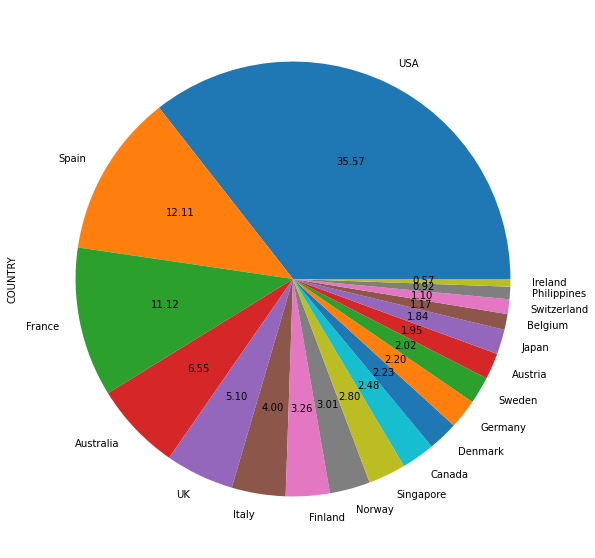

In [36]:
data['COUNTRY'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f')

<AxesSubplot:ylabel='STATUS'>

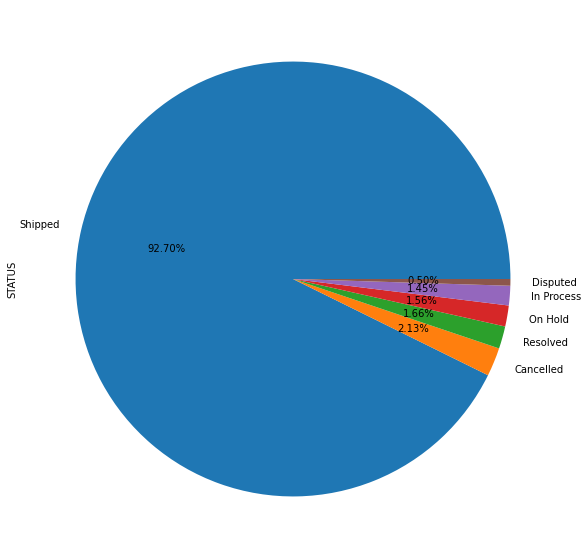

In [37]:
data['STATUS'].value_counts().plot(kind='pie', figsize=(10,10), autopct='%.2f%%')

# Line Chart

**When to use**:
- If you have a continuous dataset that changes over time.
- If your dataset is too big for a bar chart.
- If you want to display multiple series for the same timeline.
- If you want to visualize trends instead of exact values.

**When to avoid**:
- Line charts work better with bigger datasets, so, if you have a small one, use a bar chart instead.

<AxesSubplot:xlabel='ORDERDATE'>

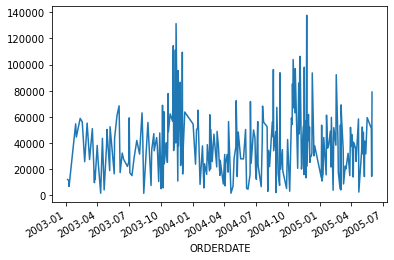

In [39]:
data['ORDERDATE'] = data['ORDERDATE'].astype('datetime64[ns]')

sorted_data = data.sort_values(by='ORDERDATE',ascending=True).groupby('ORDERDATE').sum()

fig, axes = plt.subplots()
sorted_data['SALES'].plot(kind='line',ax=axes)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_23684/2399708425.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(sorted_data.index,rotation=45)


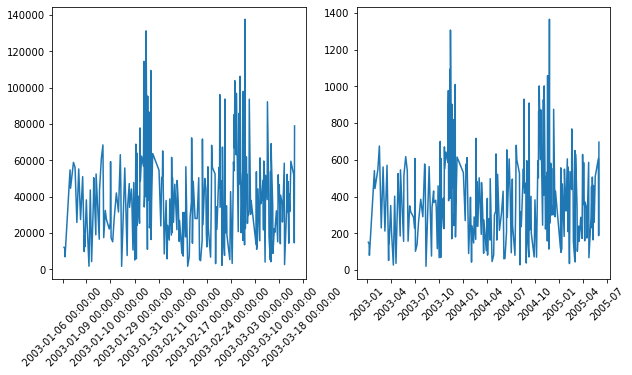

In [40]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
axes[0].plot(sorted_data.index,sorted_data['SALES'])
axes[1].plot(sorted_data.index,sorted_data['QUANTITYORDERED'])
plt.xticks(rotation=45)
axes[0].set_xticklabels(sorted_data.index,rotation=45)
#axes[0].set_ylim(100,10000)
plt.show()

In [41]:
sorted_data.index

DatetimeIndex(['2003-01-06', '2003-01-09', '2003-01-10', '2003-01-29',
               '2003-01-31', '2003-02-11', '2003-02-17', '2003-02-24',
               '2003-03-03', '2003-03-10',
               ...
               '2005-05-03', '2005-05-05', '2005-05-06', '2005-05-09',
               '2005-05-10', '2005-05-13', '2005-05-17', '2005-05-29',
               '2005-05-30', '2005-05-31'],
              dtype='datetime64[ns]', name='ORDERDATE', length=252, freq=None)

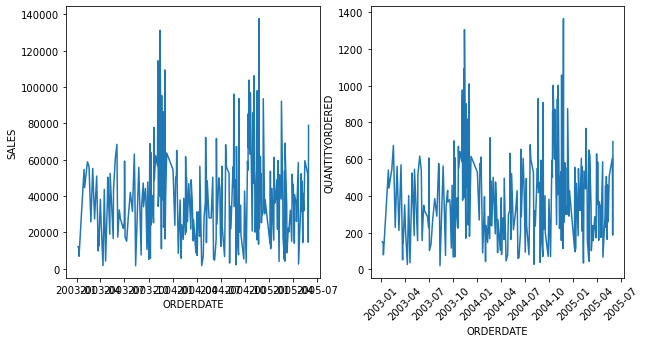

In [42]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.lineplot(x=sorted_data.index,y=sorted_data['SALES'],ax=axes[0])
sns.lineplot(x=sorted_data.index,y=sorted_data['QUANTITYORDERED'],ax=axes[1])
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Jumlah Produk yang Terjual Harian')

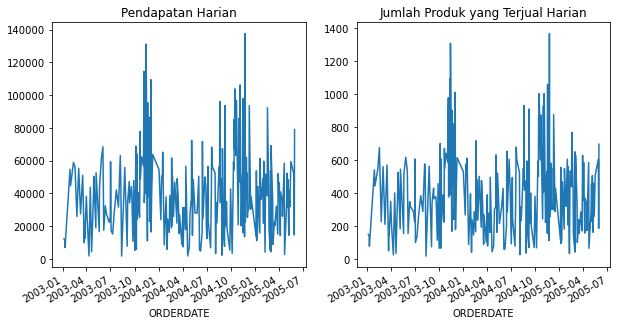

In [43]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sorted_data['SALES'].plot(ax=axes[0])
sorted_data['QUANTITYORDERED'].plot(ax=axes[1])
axes[0].set_title('Pendapatan Harian')
axes[1].set_title('Jumlah Produk yang Terjual Harian')

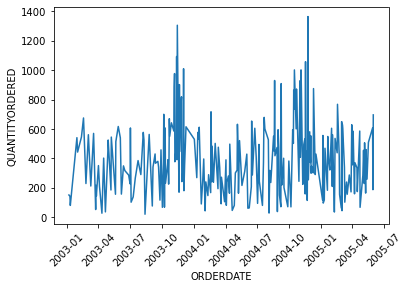

In [44]:
sns.lineplot(x=sorted_data.index,y=sorted_data['QUANTITYORDERED'])
plt.xticks(rotation=45)
plt.show()

In [45]:
sorted_data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
ORDERDATE,,,,,,,,,
2003-01-06,40400,151,288.78,10,12133.25,4,4,8012,363
2003-01-09,40404,142,284.96,10,11432.34,4,4,8012,372
2003-01-10,20204,80,150.14,3,6864.05,2,2,4006,155
2003-01-29,161648,541,1417.54,136,54702.00,16,16,32048,1695
2003-01-31,131352,443,1061.89,91,44621.96,13,13,26039,1365
...,...,...,...,...,...,...,...,...,...
2005-05-13,62502,259,561.18,21,31821.90,12,30,12030,728
2005-05-17,145866,509,1269.43,105,59475.10,28,70,28070,1669
2005-05-29,156302,607,1148.40,94,51233.18,30,75,30075,1328


# Scatter Plot
**When to use**:
- To show correlation and clustering in big datasets.
- If your dataset contains points that have a pair of values.
- If the order of points in the dataset is not essential.

**When to avoid**:
- If you have a small dataset.
- If the values in your dataset are not correlated.

Text(0.5, 1.0, 'Relationship between Quantity Ordered and Sales')

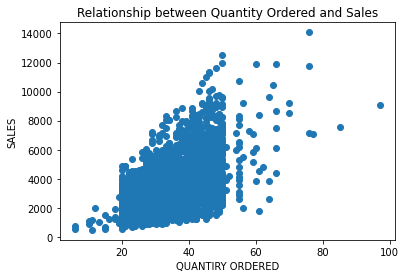

In [46]:
fig,axes = plt.subplots()
axes.scatter(data['QUANTITYORDERED'],data['SALES'])
axes.set_xlabel('QUANTIRY ORDERED')
axes.set_ylabel('SALES')
axes.set_title('Relationship between Quantity Ordered and Sales')

<AxesSubplot:xlabel='QUANTITYORDERED', ylabel='SALES'>

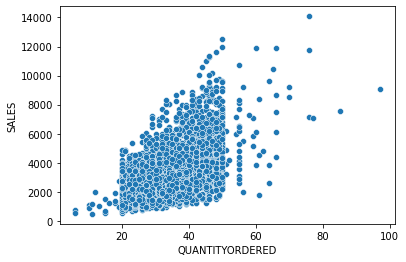

In [47]:
sns.scatterplot(data=data,x='QUANTITYORDERED',y='SALES')

# Bubble Plot
**When to use**:
- If you want to compare independent values.
- If you want to show distribution or relation.
**When to avoid**:
- If you have a small dataset.

<AxesSubplot:xlabel='QUANTITYORDERED', ylabel='SALES'>

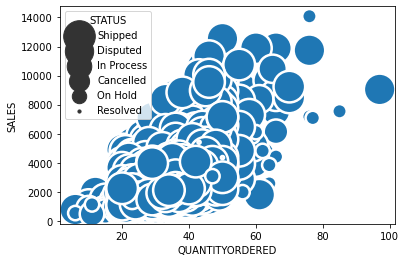

In [48]:
sns.scatterplot(data=data,x='QUANTITYORDERED',y='SALES',size='STATUS',sizes=(10,1000))

<AxesSubplot:xlabel='QUANTITYORDERED', ylabel='SALES'>

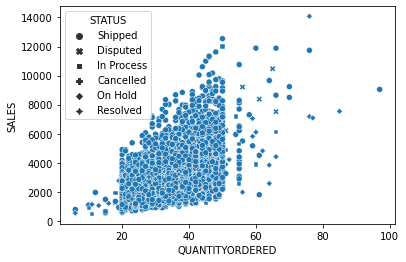

In [49]:
sns.scatterplot(data=data,x='QUANTITYORDERED',y='SALES',style='STATUS')

# Area Plot
**When to use**:
- If you want to show part-to-whole relations.
- If you want to portray the volume of your data and not just the relation to time.
**When to avoid**:
- It can’t be used with discrete data.

<AxesSubplot:xlabel='ORDERDATE'>

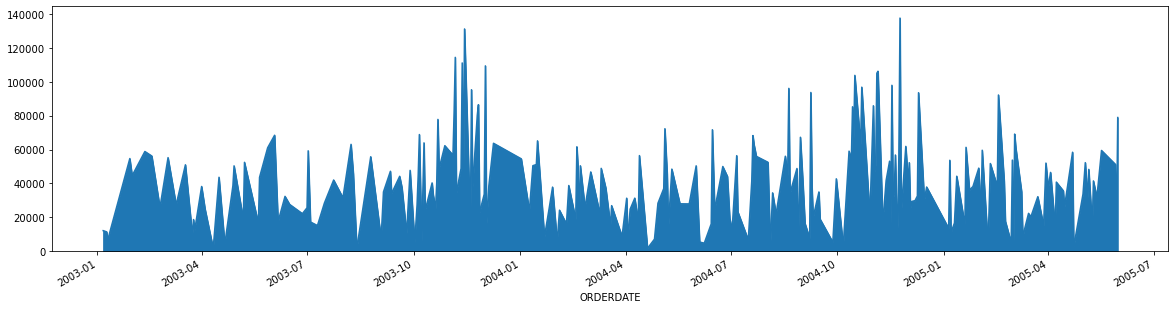

In [50]:
sorted_data['SALES'].plot(kind='area',figsize=(20,5))

<AxesSubplot:xlabel='ORDERDATE'>

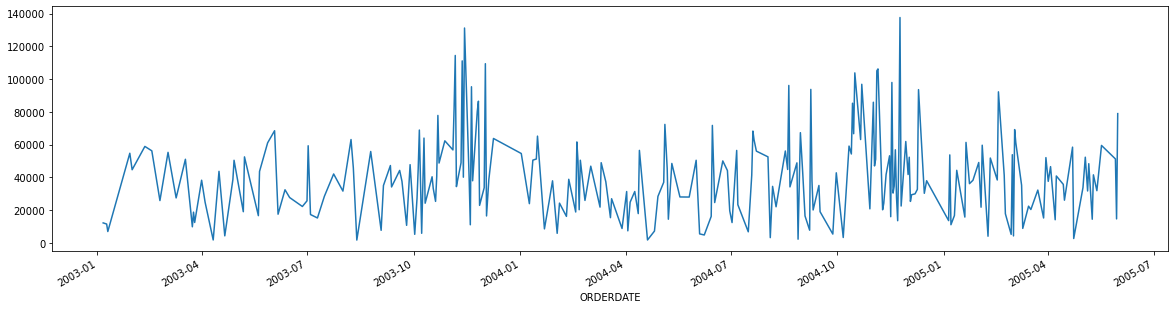

In [51]:
sorted_data['SALES'].plot(figsize=(20,5))